# PRODIGY TASK-1

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import csv
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# WORKING ON 'TRAIN' DATASET

In [2]:
#READING THE TRAINING DATA TO PERFORM ANALYSIS & FORM A MODEL
df=pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#INCLUDING ONLY THE NECESSARY & REQUIRED COLUMNS/ATTRIBUTES 
cols=[1,4,17,18,19,20,43,46,49,51,52,54,76,77,80]
df=df[df.columns[cols]]

In [5]:
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,856,1710,2,3,1,8,2,2008,208500
1,20,9600,6,8,1976,1976,1262,1262,2,3,1,6,5,2007,181500
2,60,11250,7,5,2001,2002,920,1786,2,3,1,6,9,2008,223500
3,70,9550,7,5,1915,1970,961,1717,1,3,1,7,2,2006,140000
4,60,14260,8,5,2000,2000,1145,2198,2,4,1,9,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,1647,2,3,1,7,8,2007,175000
1456,20,13175,6,6,1978,1988,2073,2073,2,3,1,7,2,2010,210000
1457,70,9042,7,9,1941,2006,1188,2340,2,4,1,9,5,2010,266500
1458,20,9717,5,6,1950,1996,1078,1078,1,2,1,5,4,2010,142125


In [6]:
#CHECKING FOR ANY NULL VALUE
df.isnull().sum()

MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

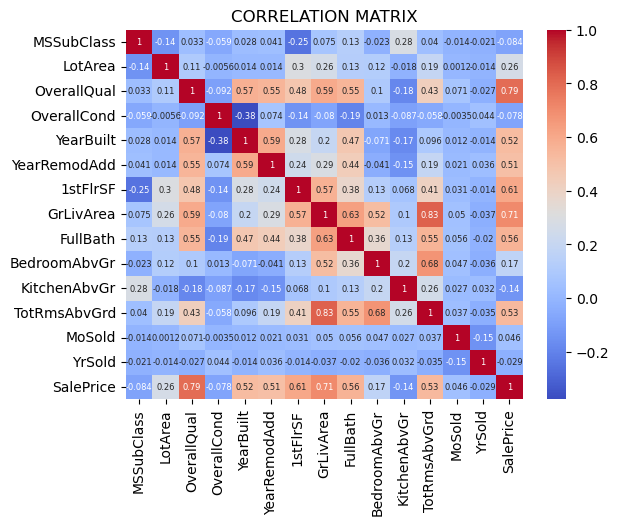

<Figure size 10000x1000 with 0 Axes>

In [7]:
#DATA VISUALIZATION
corr_mat=df.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', annot_kws={"size": 6} )
plt.title('CORRELATION MATRIX')
plt.figure(figsize=(100, 10))
plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

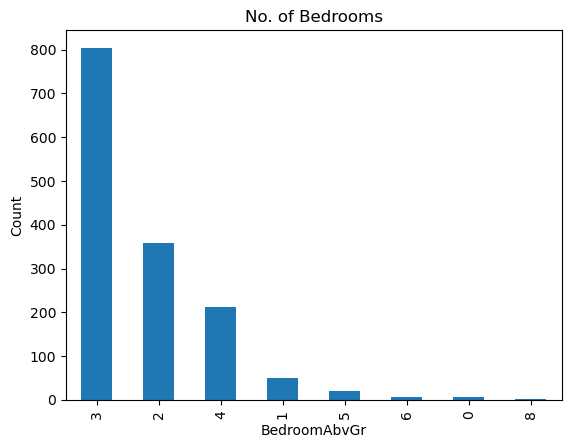

In [8]:
df['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title("No. of Bedrooms")
plt.xlabel('BedroomAbvGr')
plt.ylabel('Count')
sns.despine

#As we can see from the visualization 3 bedroom houses are most commonly sold followed by 2 bedroom.

Text(0, 0.5, 'Sale Price')

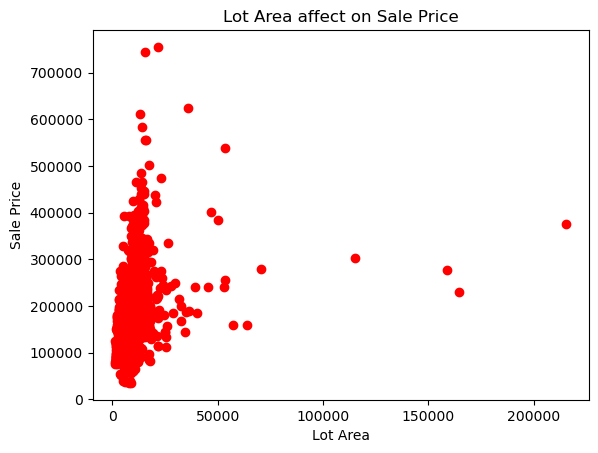

In [9]:
plt.scatter((df['LotArea']),df['SalePrice'], color="red")
plt.title("Lot Area affect on Sale Price")
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

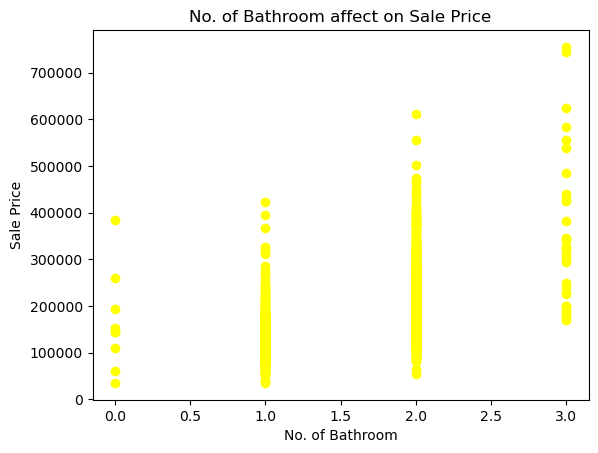

In [10]:
plt.scatter(df['FullBath'],df['SalePrice'], color="yellow")
plt.title("No. of Bathroom affect on Sale Price")
plt.xlabel('No. of Bathroom')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

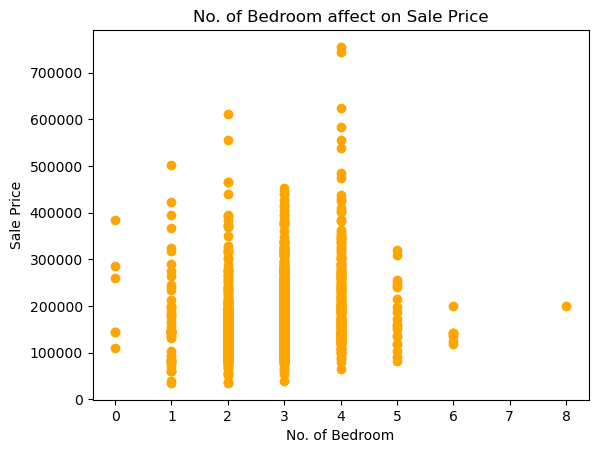

In [11]:
plt.scatter((df['BedroomAbvGr']),df['SalePrice'], color="orange")
plt.title("No. of Bedroom affect on Sale Price")
plt.xlabel('No. of Bedroom')
plt.ylabel('Sale Price')

In [12]:
X=df.drop(columns='SalePrice')
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,MoSold,YrSold
0,60,8450,7,5,2003,2003,856,1710,2,3,1,8,2,2008
1,20,9600,6,8,1976,1976,1262,1262,2,3,1,6,5,2007
2,60,11250,7,5,2001,2002,920,1786,2,3,1,6,9,2008
3,70,9550,7,5,1915,1970,961,1717,1,3,1,7,2,2006
4,60,14260,8,5,2000,2000,1145,2198,2,4,1,9,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,1647,2,3,1,7,8,2007
1456,20,13175,6,6,1978,1988,2073,2073,2,3,1,7,2,2010
1457,70,9042,7,9,1941,2006,1188,2340,2,4,1,9,5,2010
1458,20,9717,5,6,1950,1996,1078,1078,1,2,1,5,4,2010


In [13]:
y=df['SalePrice']

In [14]:
#Splitting of 'TRAIN'dataset into training and testing in the ratio of 70:30 respectively.
#First we import the library required to split our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_train=lr.predict(X_train)

In [18]:
print(y_pred_train)

[243992.68972499 172385.73629448 119876.20729756 ... 176803.30602141
 223645.48340395 223822.9436401 ]


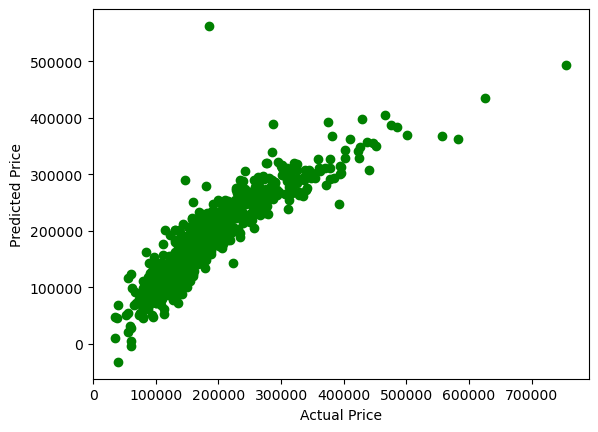

In [19]:
#PLOTTING THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(y_train, y_pred_train, color="green")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [20]:
#EVALUATING THE MODEL
r2_score(y_train, y_pred_train)

0.8115550796968064

In [21]:
y_pred_test=lr.predict(X_test)

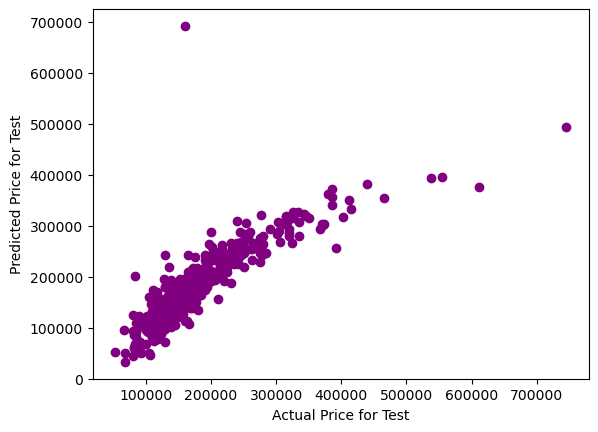

In [22]:
plt.scatter(y_test, y_pred_test, color="purple")
plt.xlabel("Actual Price for Test")
plt.ylabel("Predicted Price for Test")
plt.show()

In [23]:
#EVALUATING THE MODEL
r2_score(y_test, y_pred_test)

0.7273094080462617

# WORKING  ON 'TEST' DATASET TO PREDICT SALEPRICE

In [24]:
data1=pd.read_csv("test.csv")
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [25]:
cols=[1,4,17,18,19,20,43,46,49,51,52,54,76,77]
data1=data1[data1.columns[cols]]

In [26]:
data1.isnull().sum()

MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
MoSold          0
YrSold          0
dtype: int64

In [27]:
X=data1

In [28]:
y=pd.read_csv("sample_submission (1).csv")

In [29]:
X_train, y_train = df.drop(['SalePrice'],axis=1), df['SalePrice']
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
X_test = data1

In [31]:
#Predicting the TEST data based on the model formed using the TRAIN dataset
predictions = lr.predict(X_test)

In [32]:
predictions

array([122246.6379451 , 168582.23236774, 169220.35292493, ...,
       147374.7685582 , 125670.70701137, 242675.34798197])

In [33]:
y['SalePrice']=predictions

In [34]:
y

,Id,SalePrice
0,1461,122246.637945
1,1462,168582.232368
2,1463,169220.352925
3,1464,196107.614223
4,1465,207825.739285
...,...,...
1454,2915,77733.060288
1455,2916,72123.346118
1456,2917,147374.768558
1457,2918,125670.707011


In [35]:
#Saving predictions to a csv file

In [36]:
predictions_df = pd.DataFrame(predictions, columns=["SalePrice"])
predictions_df.to_csv("predictions.csv", index=False)

print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [37]:
predicteddata = pd.read_csv("predictions.csv")  
predictedvalues = predicteddata["SalePrice"].values

In [38]:
index = range(1, len(predictedvalues) + 1)

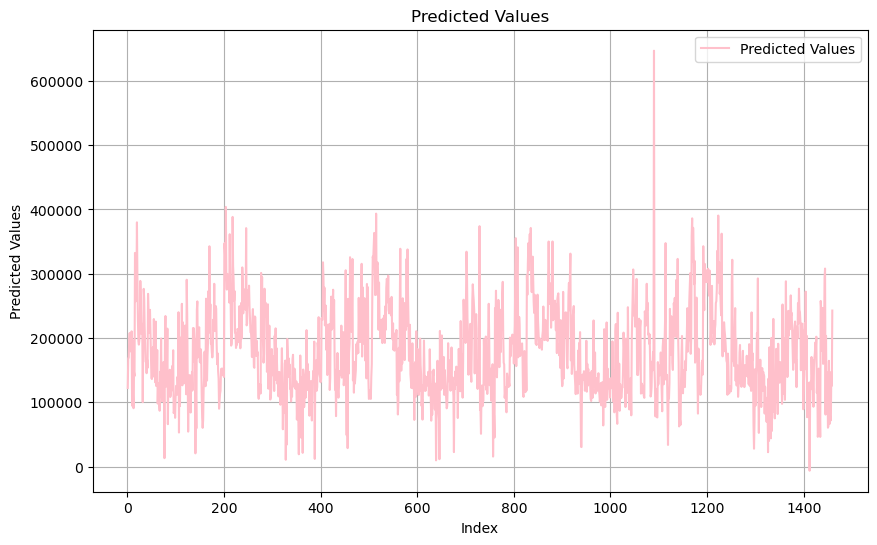

In [39]:
#PLOTTING THE PREDICTED VALUES FOR THE TEST DATA 
plt.figure(figsize=(10, 6))
plt.plot(index, predictedvalues, color='pink', label='Predicted Values')
plt.title('Predicted Values')
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()